# Add 30% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 30)

Outliers found:


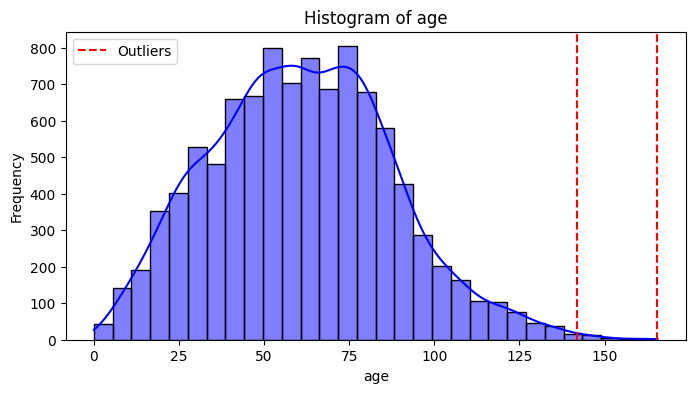

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1541
           1       0.85      0.89      0.87      1455

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Node Labels:
 Annotation(0.652401, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3454, 3534]\nclass = 1')


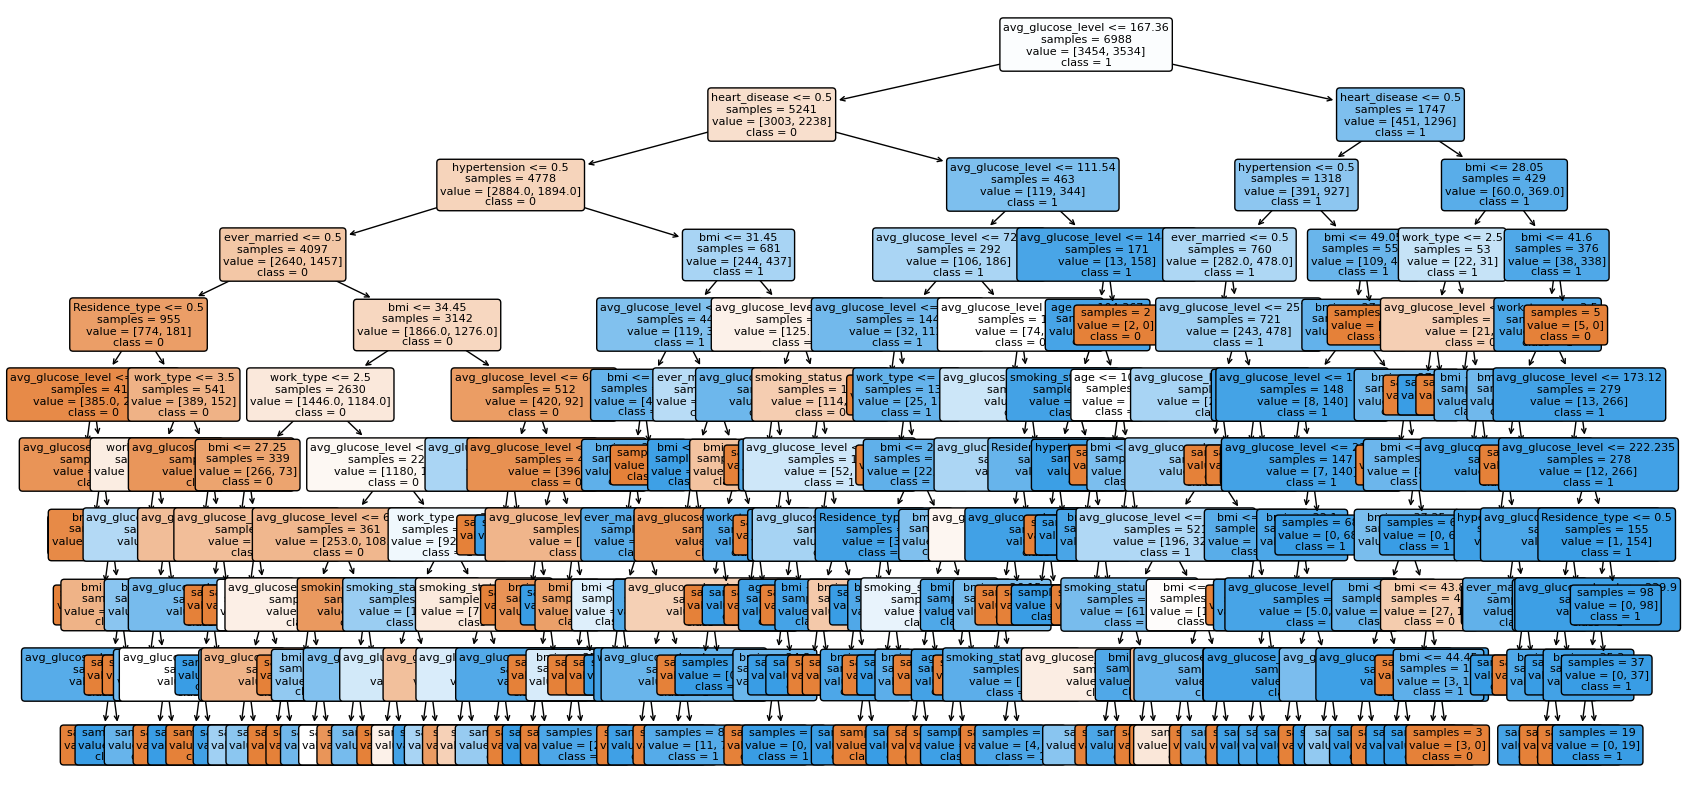

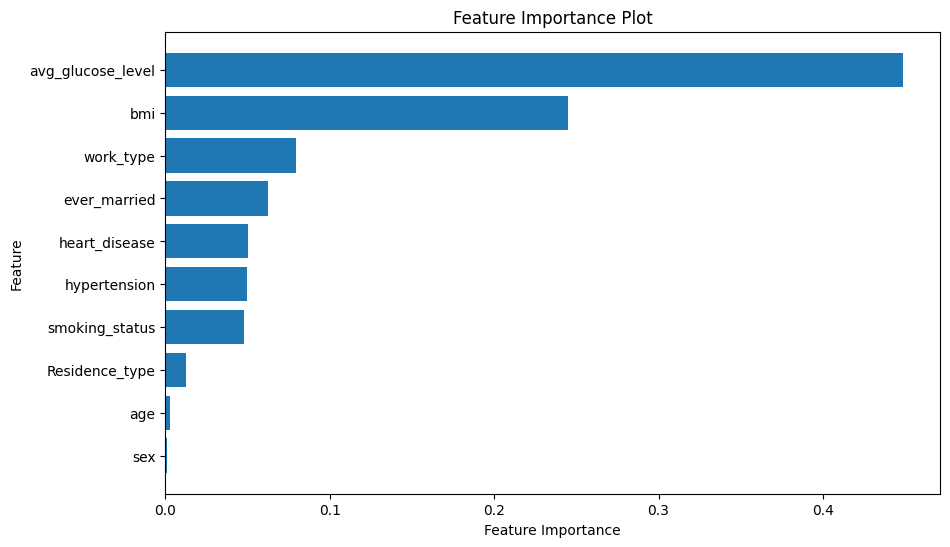

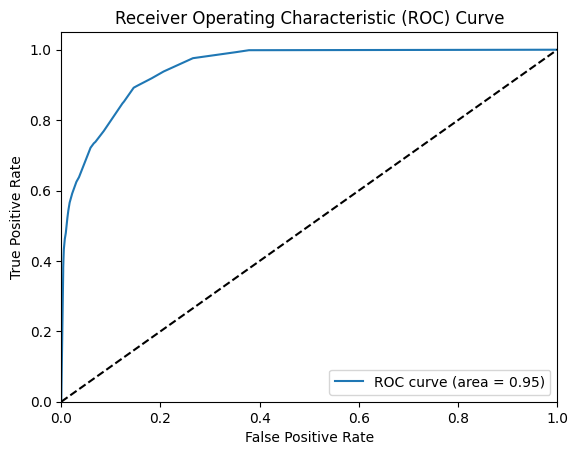

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9488527777963611
Accuracy for each fold: [0.8133333333333334, 0.7966666666666666, 0.8066666666666666, 0.8266666666666667, 0.8133333333333334, 0.78, 0.782608695652174, 0.7993311036789298, 0.8260869565217391, 0.8294314381270903]
Mean accuracy: 0.8074124860646601
95% confidence interval: (0.7947443690004895, 0.8200806031288307)


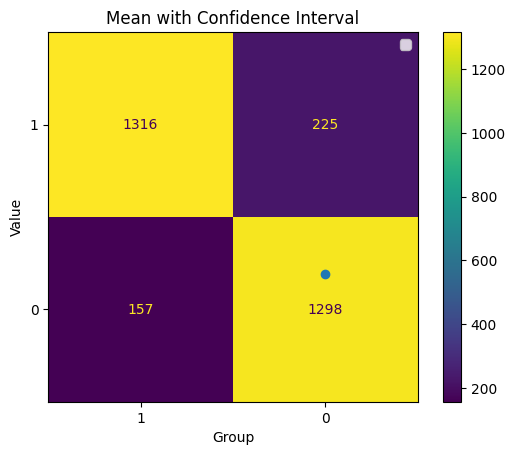

In [6]:
y_pred_prob_age_dt, y_test_age_dt, decision_tree = ML_algorithms.model_dt(df_age, df_original)
mean_accuracy_dt_age, confidence_interval_dt_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.78      0.72      1541
           1       0.71      0.57      0.64      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.68      0.68      2996



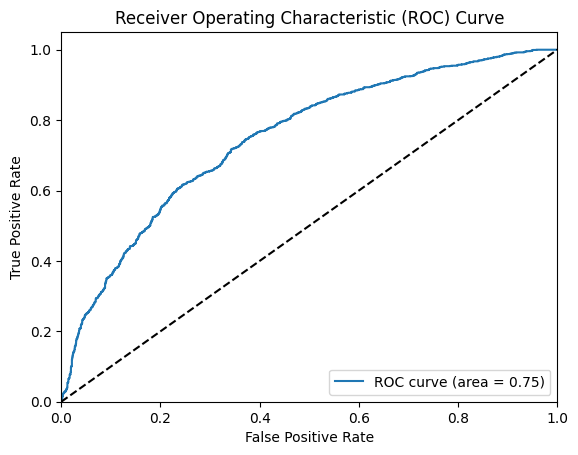

AUC Score: 0.7477962049902883


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.62, 0.6266666666666667, 0.7066666666666667, 0.66, 0.67, 0.6733333333333333, 0.6454849498327759, 0.7157190635451505, 0.6722408026755853, 0.6789297658862876]
Mean accuracy: 0.6669041248606467
95% confidence interval: (0.6449024948571673, 0.688905754864126)


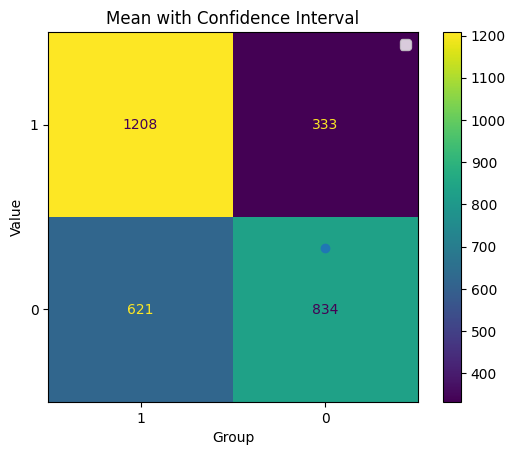

In [7]:
y_pred_prob_age_svm, y_test_age_svm, svm = ML_algorithms.model_svm(df_age, df_original)
mean_accuracy_svm_age, confidence_interval_svm_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

Outliers found:


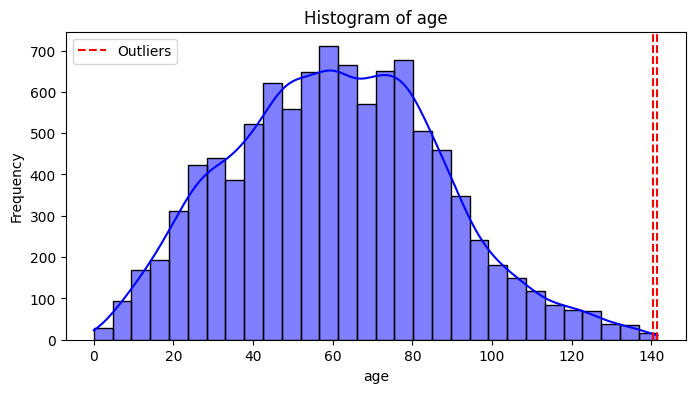

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1541
           1       0.85      0.89      0.87      1455

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Node Labels:
 Annotation(0.652401, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3454, 3534]\nclass = 1')


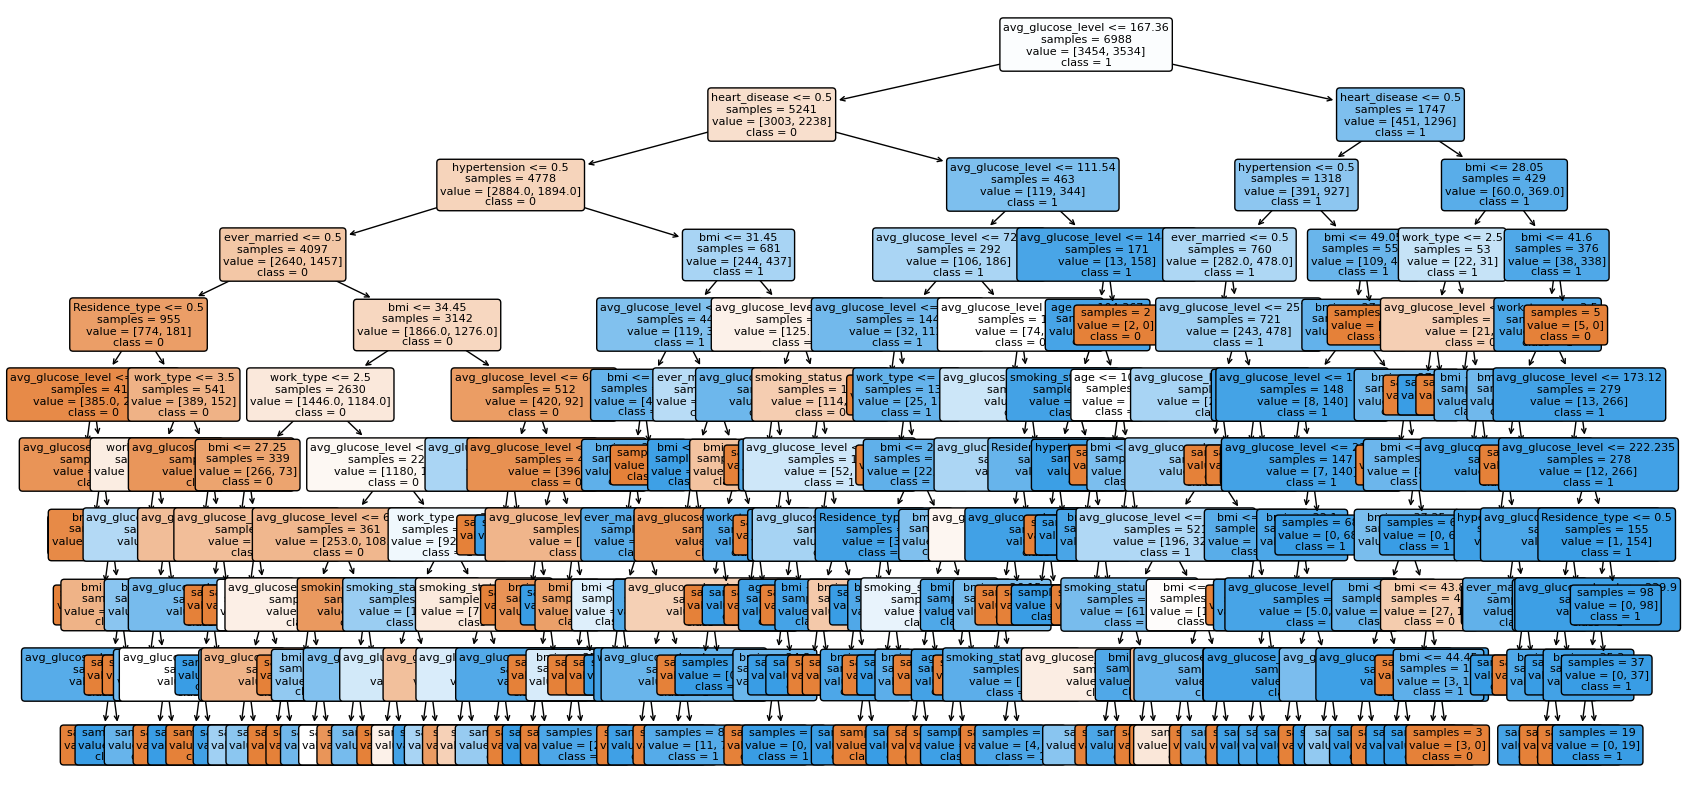

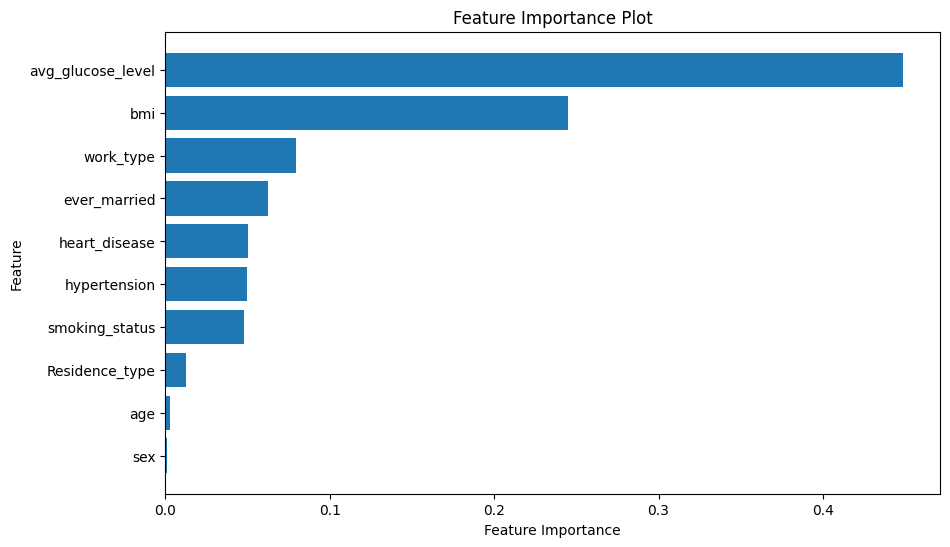

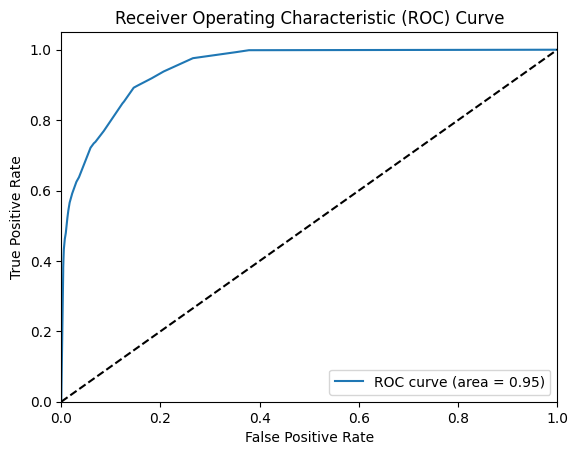

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9488527777963611
Accuracy for each fold: [0.78, 0.8333333333333334, 0.7933333333333333, 0.8133333333333334, 0.8066666666666666, 0.81, 0.8193979933110368, 0.7926421404682275, 0.8060200668896321, 0.8060200668896321]
Mean accuracy: 0.8060746934225195
95% confidence interval: (0.7953797383674849, 0.8167696484775541)


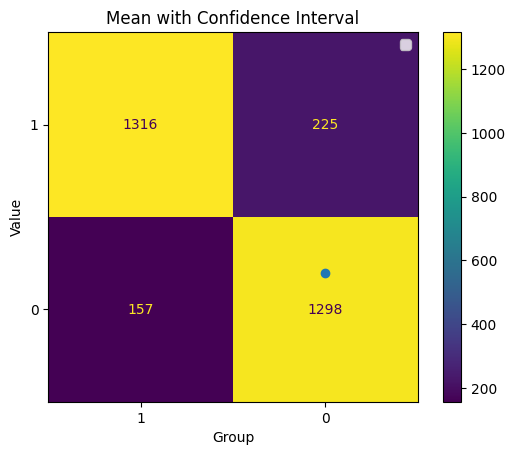

In [10]:
y_prob_dt_20_age, y_test_dt_20_age, decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
mean_accuracy_dt_20_age, confidence_interval_dt_20_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.78      0.72      1541
           1       0.71      0.57      0.64      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.68      0.68      2996



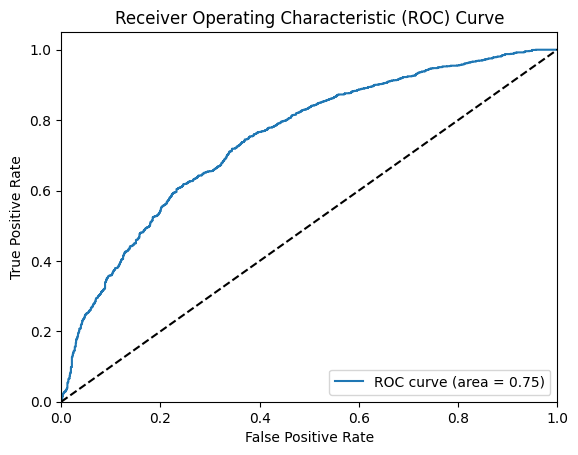

AUC Score: 0.7476155751944


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6933333333333334, 0.6233333333333333, 0.6866666666666666, 0.6633333333333333, 0.69, 0.7, 0.6588628762541806, 0.6655518394648829, 0.6555183946488294, 0.6287625418060201]
Mean accuracy: 0.6665362318840581
95% confidence interval: (0.6476419388479473, 0.6854305249201689)


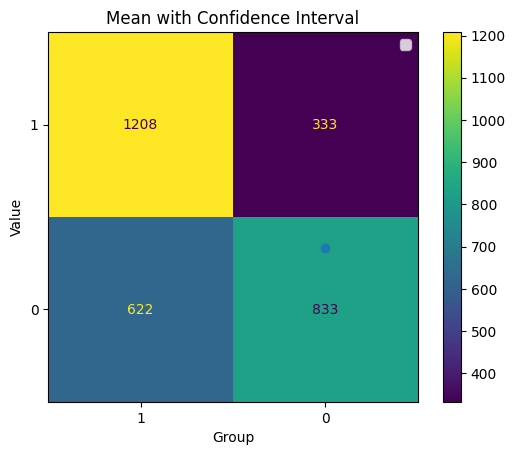

--------------------------------------


In [11]:
y_prob_svm_20_age, y_test_svm_20_age, svm = ML_algorithms.model_svm(df_mean_age, df_original)
mean_accuracy_svm_20_age, confidence_interval_svm_20_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 30)

Outliers found:


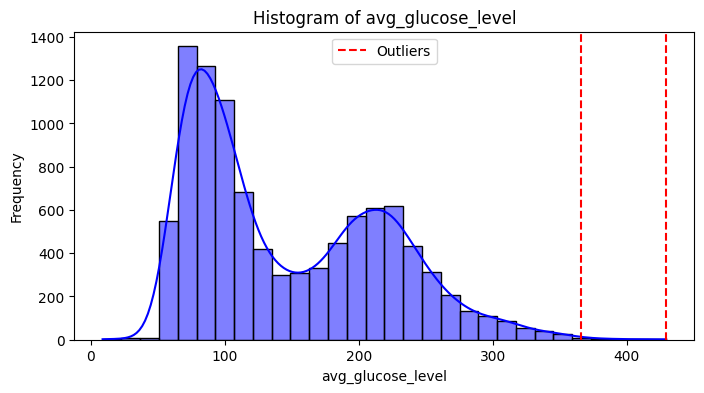

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1541
           1       0.79      0.83      0.81      1455

    accuracy                           0.81      2996
   macro avg       0.81      0.81      0.81      2996
weighted avg       0.81      0.81      0.81      2996

Node Labels:
 Annotation(0.580027, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3490, 3498]\nclass = 1')


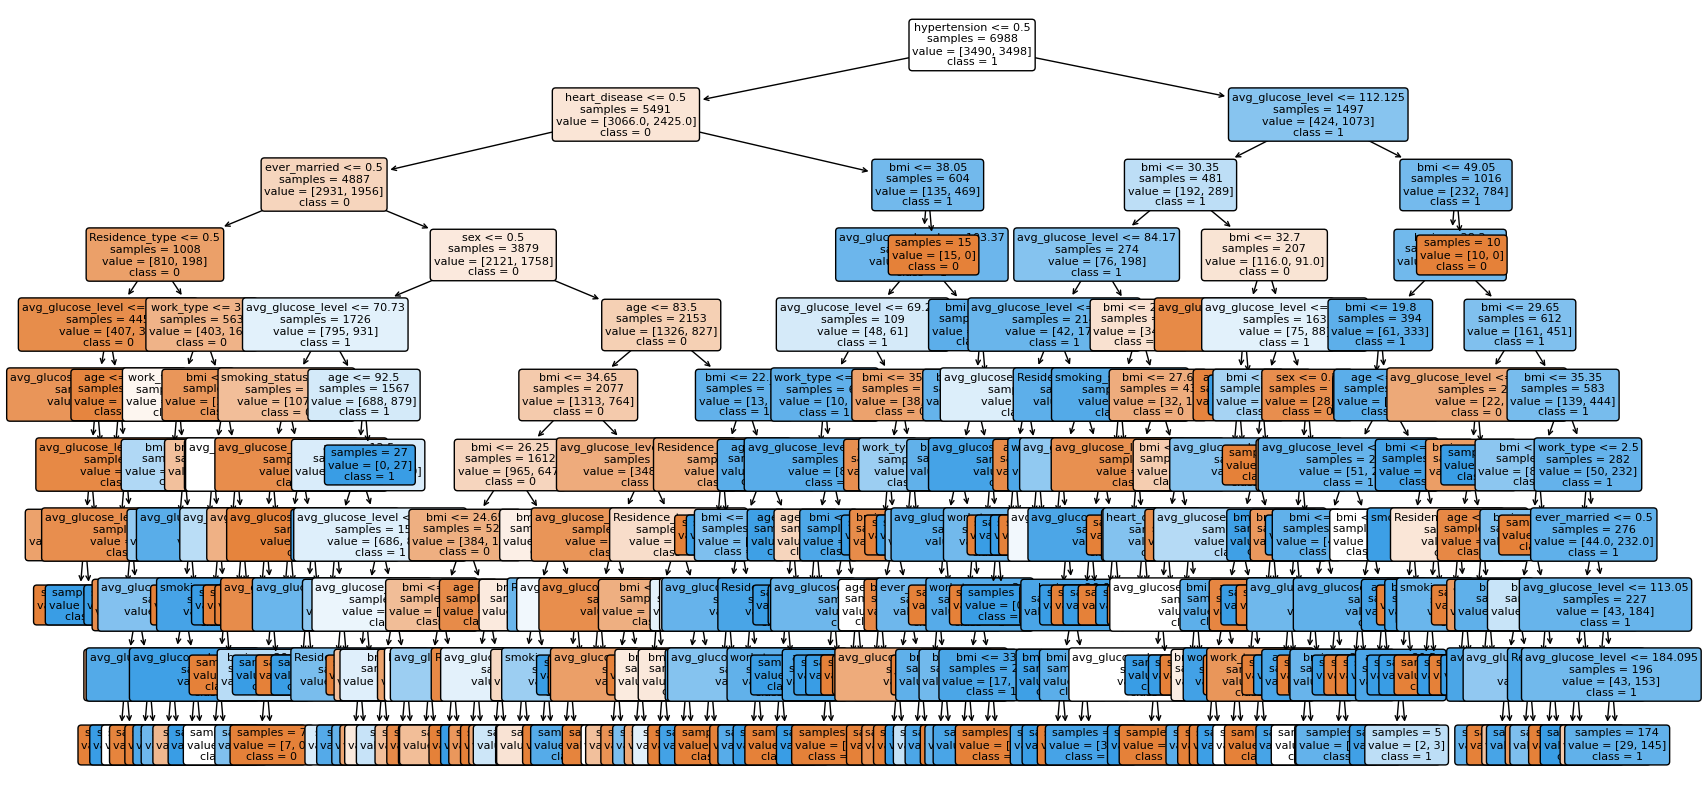

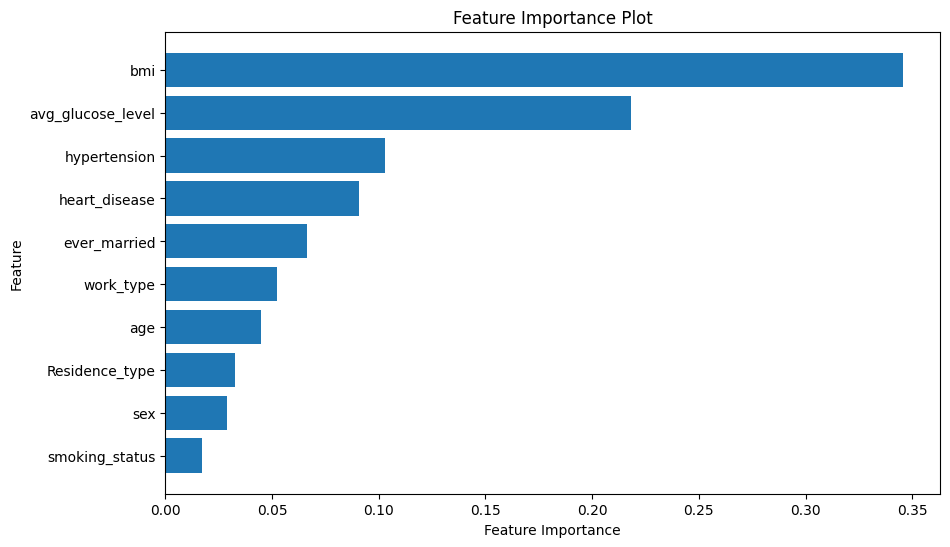

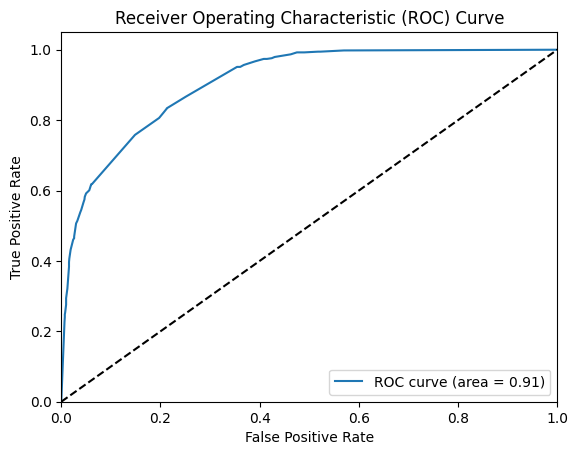

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9064837176733991
Accuracy for each fold: [0.8166666666666667, 0.8133333333333334, 0.8333333333333334, 0.78, 0.8533333333333334, 0.7866666666666666, 0.8060200668896321, 0.8260869565217391, 0.8160535117056856, 0.8260869565217391]
Mean accuracy: 0.8157580824972129
95% confidence interval: (0.8003770175403241, 0.8311391474541018)


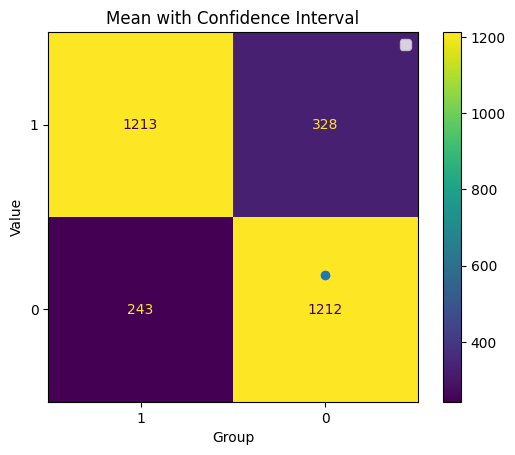

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



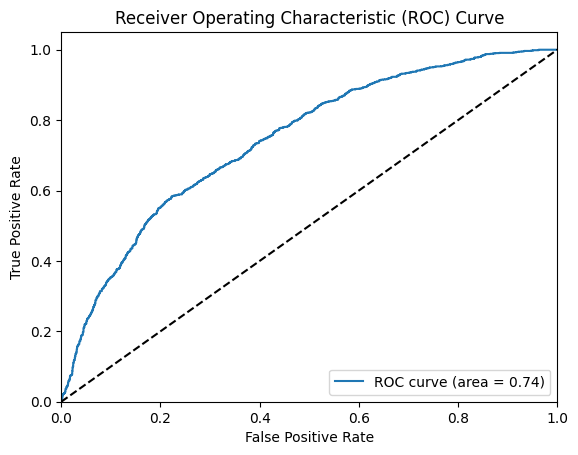

AUC Score: 0.7427595326817281


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6866666666666666, 0.6766666666666666, 0.6766666666666666, 0.6633333333333333, 0.6566666666666666, 0.68, 0.6722408026755853, 0.6488294314381271, 0.6722408026755853, 0.6220735785953178]
Mean accuracy: 0.6655384615384615
95% confidence interval: (0.6519550227131411, 0.679121900363782)


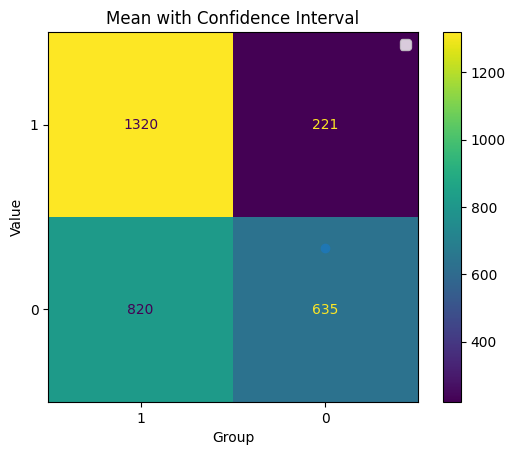

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_glucose, df_original)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1541
           1       0.78      0.83      0.81      1455

    accuracy                           0.81      2996
   macro avg       0.81      0.81      0.81      2996
weighted avg       0.81      0.81      0.81      2996

Node Labels:
 Annotation(0.575389, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3490, 3498]\nclass = 1')


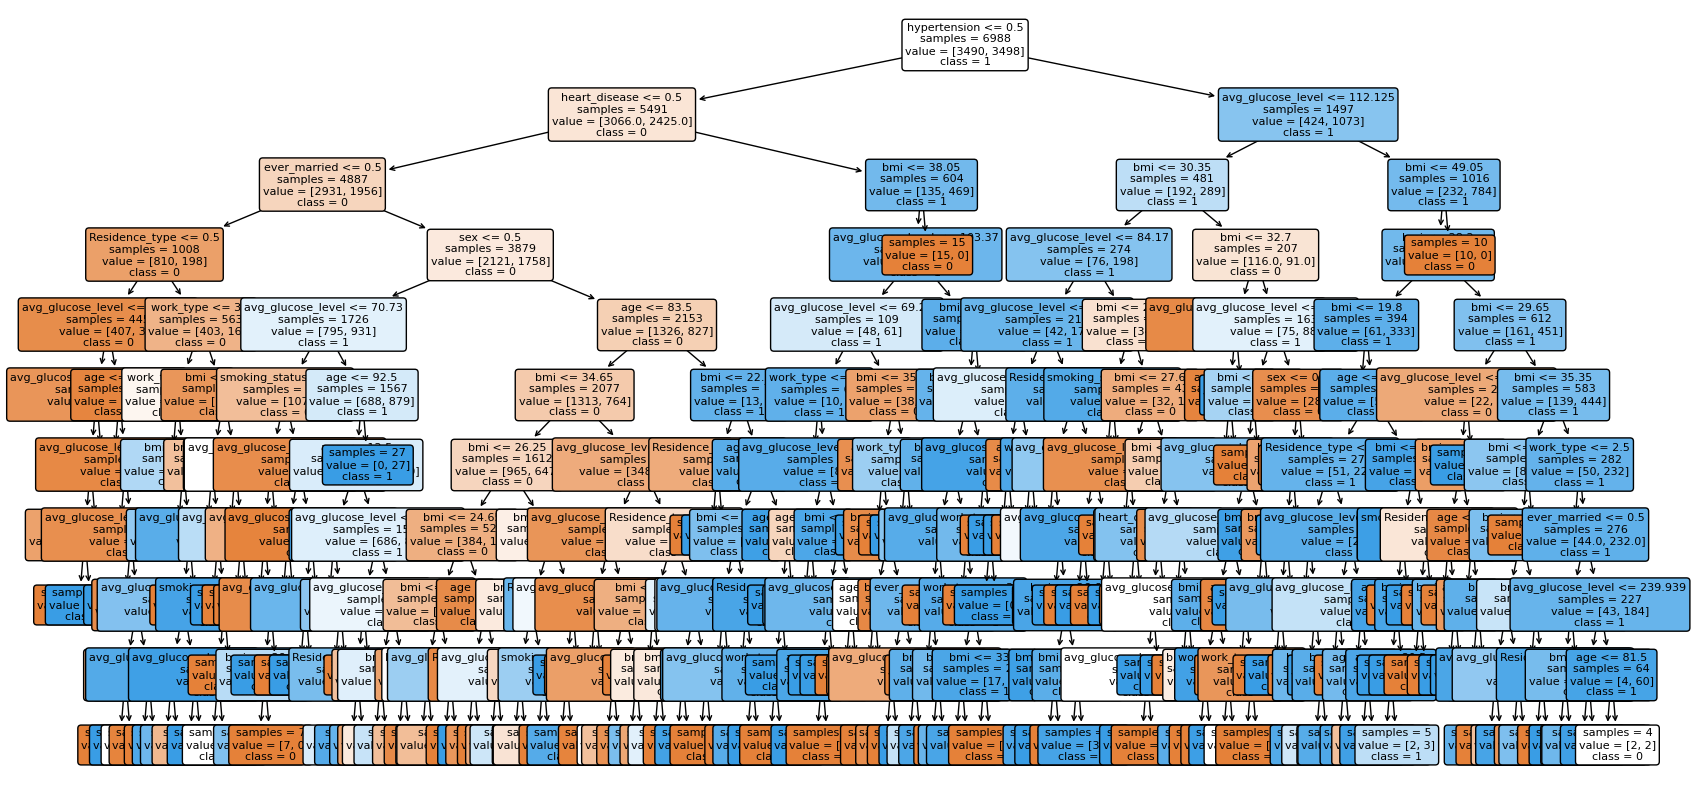

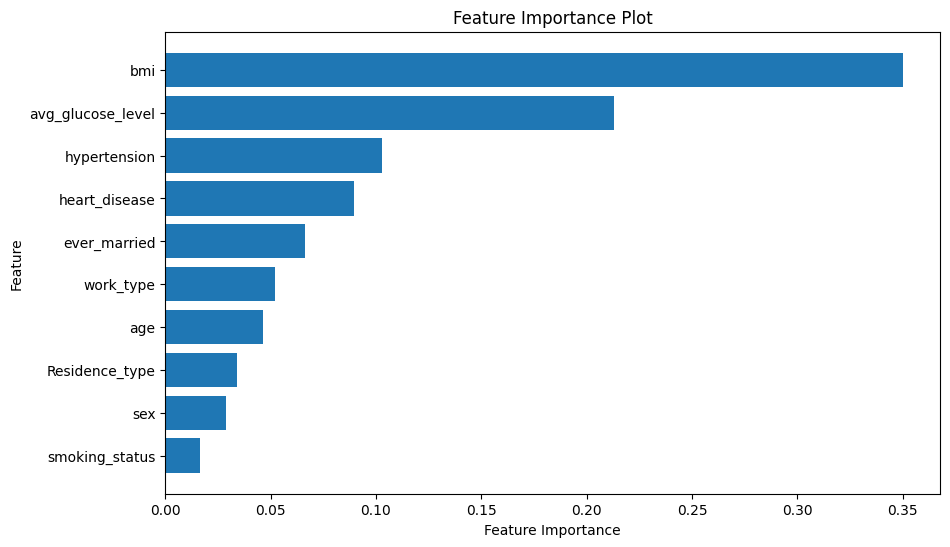

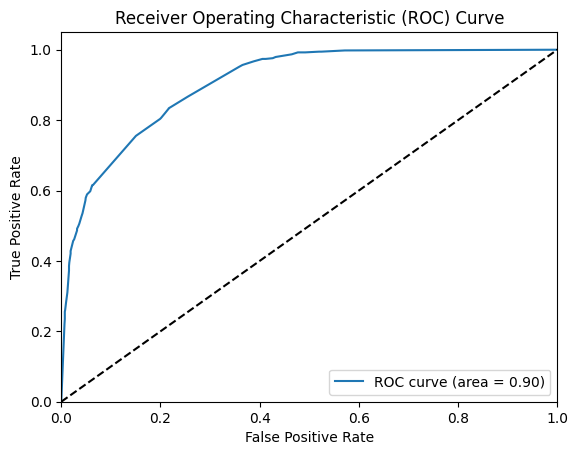

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9044800649375266
Accuracy for each fold: [0.83, 0.8066666666666666, 0.8566666666666667, 0.75, 0.8233333333333334, 0.7933333333333333, 0.8461538461538461, 0.7993311036789298, 0.8093645484949833, 0.7892976588628763]
Mean accuracy: 0.8104147157190635
95% confidence interval: (0.7884400180812945, 0.8323894133568326)


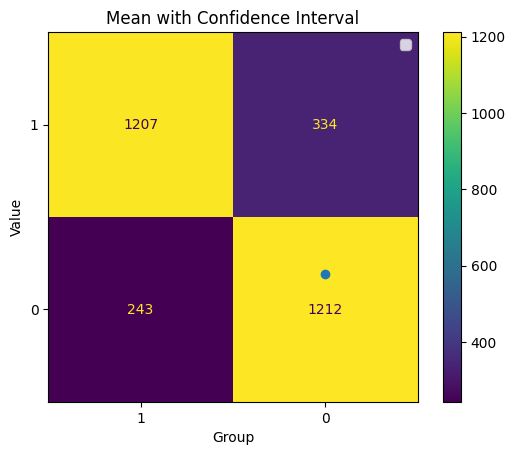

In [20]:
y_prob_dt_20_glucose, y_test_dt_20_glucose, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



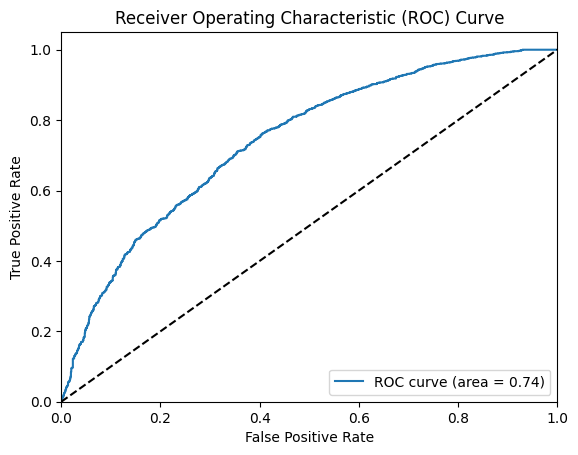

AUC Score: 0.7406298850882298


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6966666666666667, 0.6566666666666666, 0.6566666666666666, 0.6833333333333333, 0.6533333333333333, 0.7033333333333334, 0.68561872909699, 0.6120401337792643, 0.6622073578595318, 0.6555183946488294]
Mean accuracy: 0.6665384615384615
95% confidence interval: (0.6474812977628279, 0.6855956253140951)


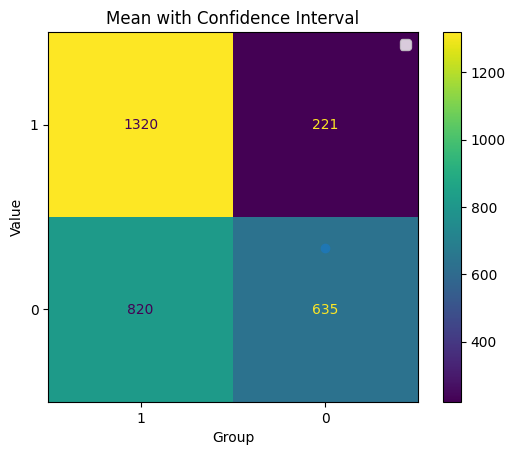

--------------------------------------


In [21]:
y_prob_svm_20_glucose, y_test_svm_20_glucose, svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


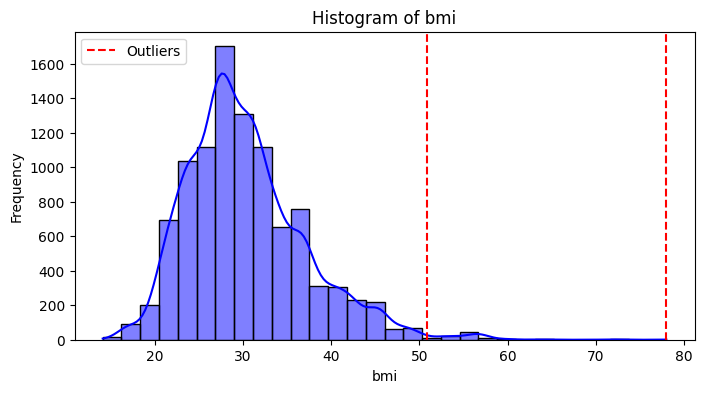

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 30)

Outliers found:


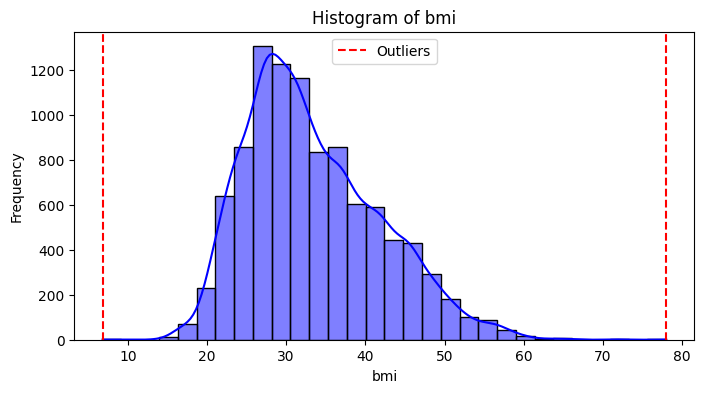

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      1541
           1       0.81      0.91      0.85      1455

    accuracy                           0.85      2996
   macro avg       0.85      0.85      0.85      2996
weighted avg       0.85      0.85      0.85      2996

Node Labels:
 Annotation(0.517594, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6988\nvalue = [3453.0, 3535.0]\nclass = 1')


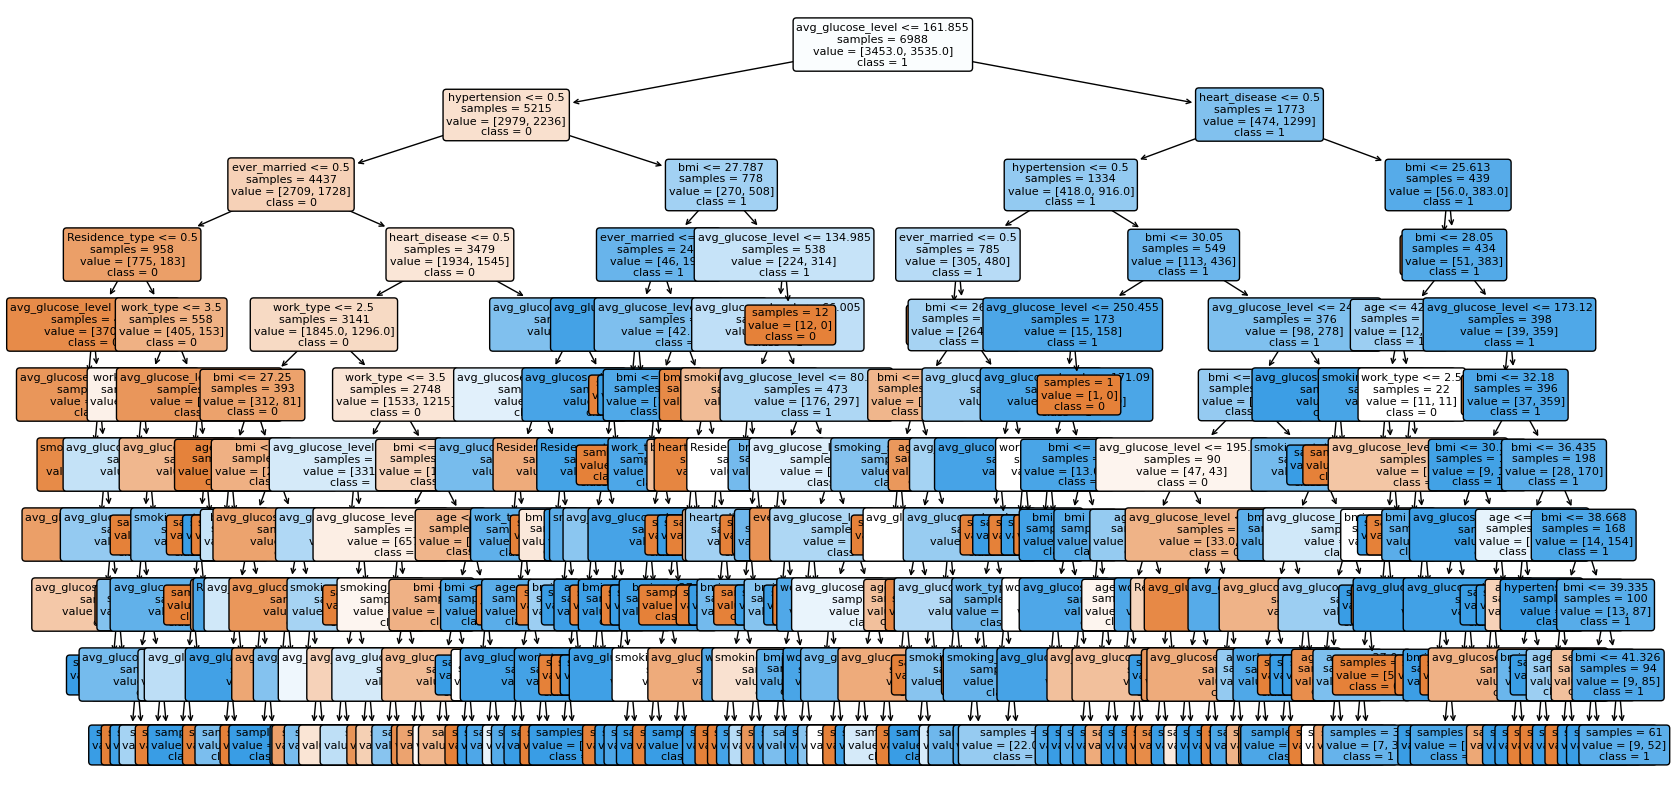

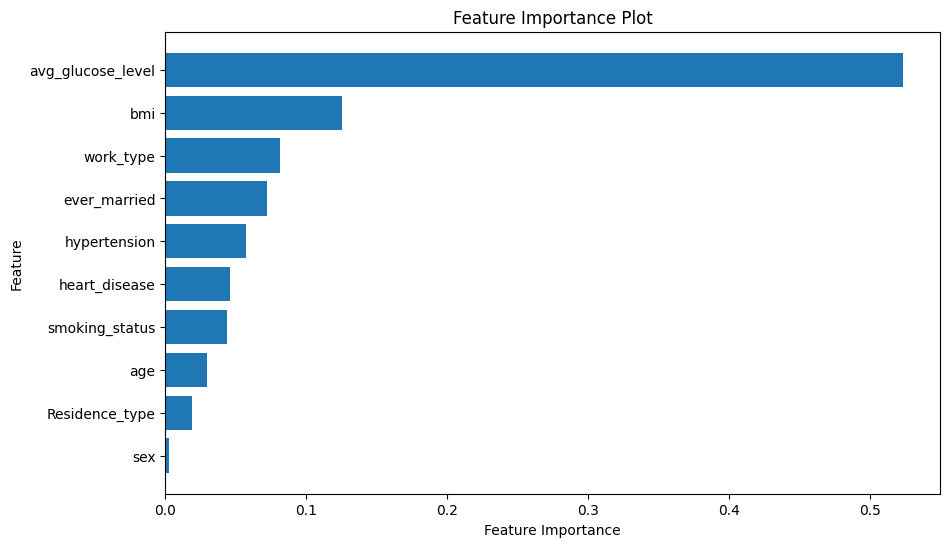

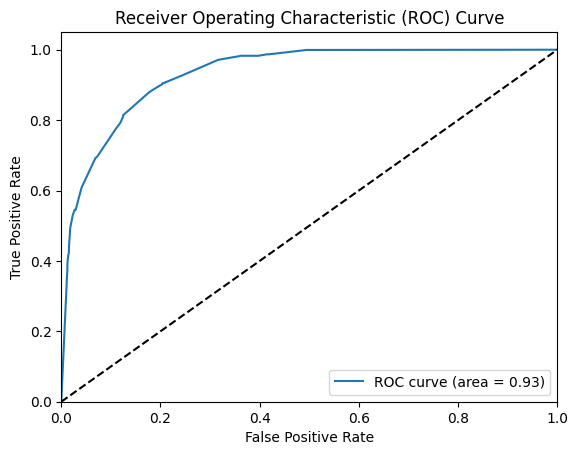

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9320020248377119
Accuracy for each fold: [0.8366666666666667, 0.79, 0.7833333333333333, 0.8033333333333333, 0.83, 0.8233333333333334, 0.8461538461538461, 0.8060200668896321, 0.8060200668896321, 0.842809364548495]
Mean accuracy: 0.8167670011148273
95% confidence interval: (0.800946708631586, 0.8325872935980685)


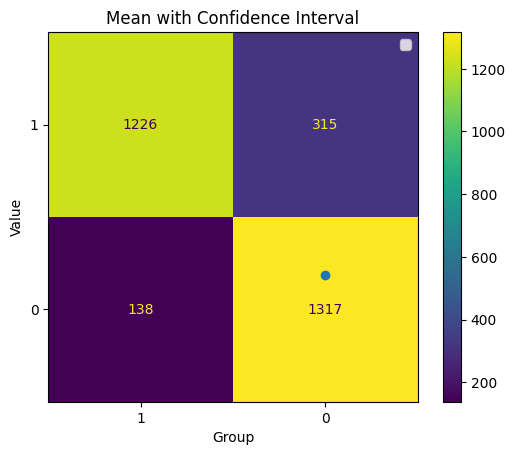

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector MAchine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1541
           1       0.71      0.59      0.64      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.68      0.68      2996



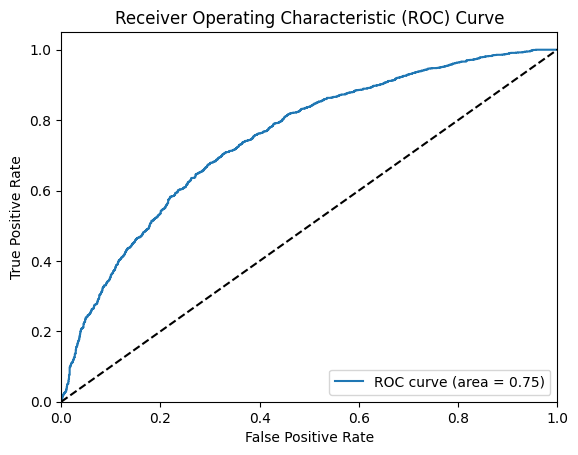

AUC Score: 0.7490565995660425


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.66, 0.67, 0.7033333333333334, 0.7266666666666667, 0.6066666666666667, 0.64, 0.6789297658862876, 0.6488294314381271, 0.6688963210702341, 0.6722408026755853]
Mean accuracy: 0.6675562987736899
95% confidence interval: (0.6439413455787913, 0.6911712519685885)


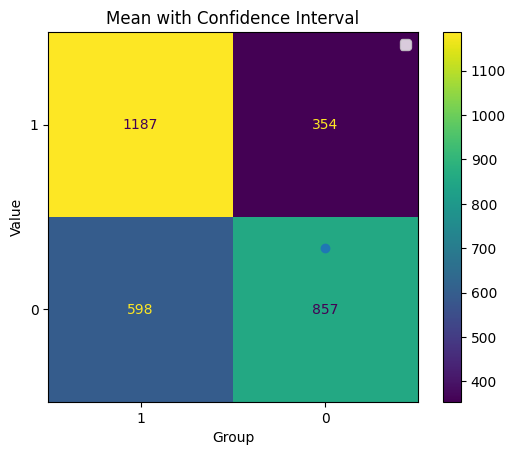

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_bmi, df_original)
mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

Outliers found:


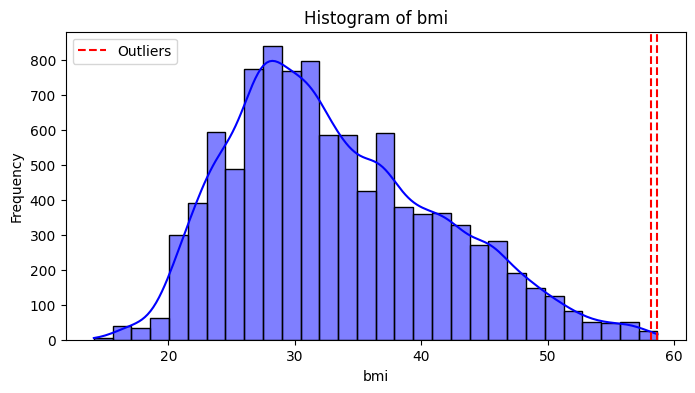

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      1541
           1       0.81      0.91      0.85      1455

    accuracy                           0.85      2996
   macro avg       0.85      0.85      0.85      2996
weighted avg       0.85      0.85      0.85      2996

Node Labels:
 Annotation(0.528013, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6988\nvalue = [3453.0, 3535.0]\nclass = 1')


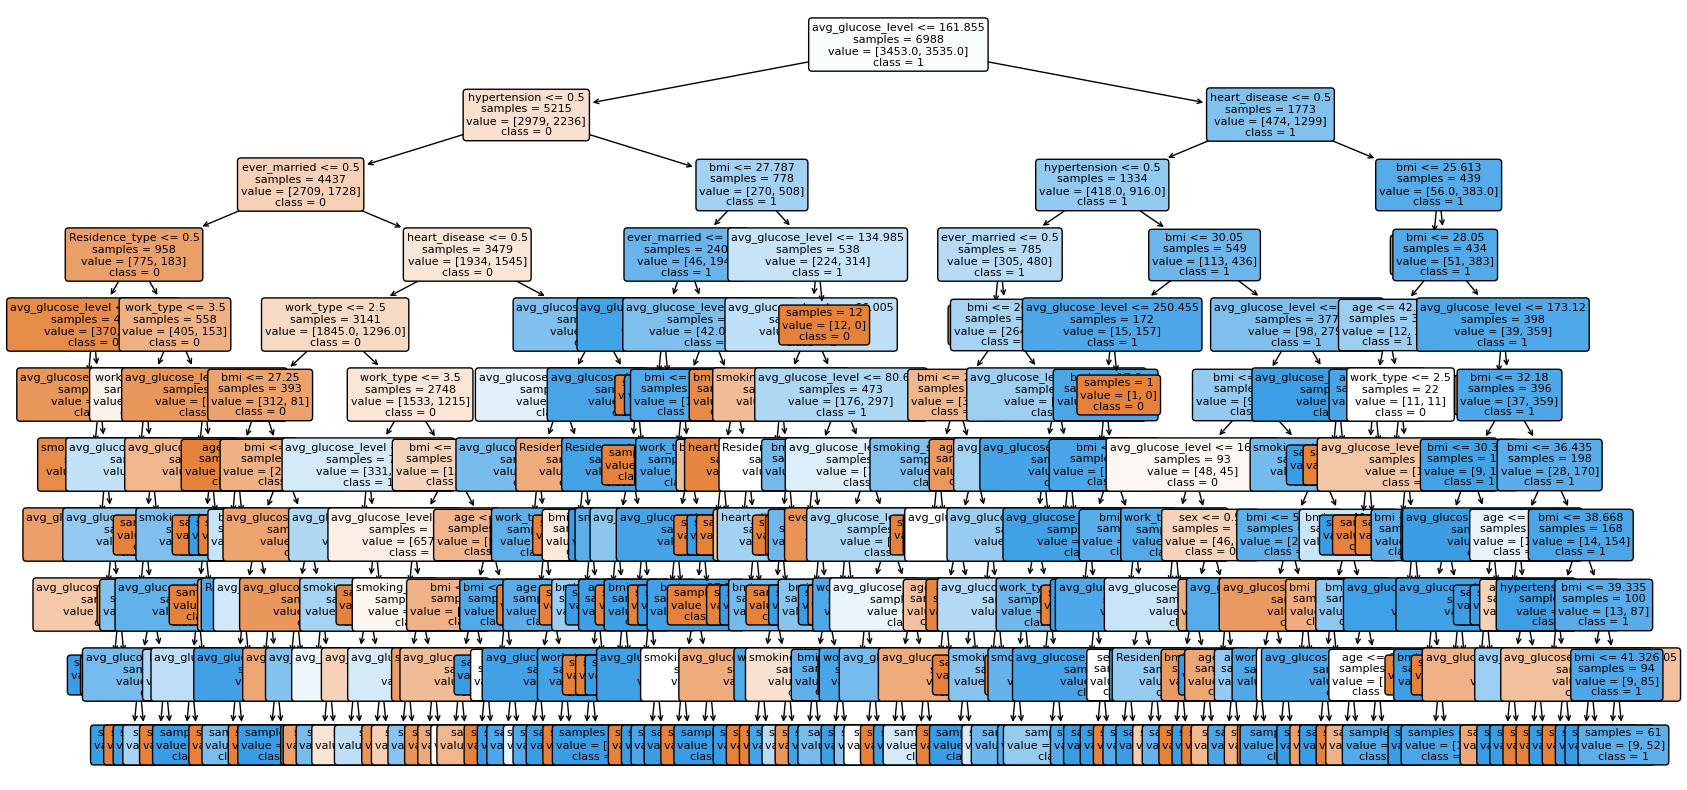

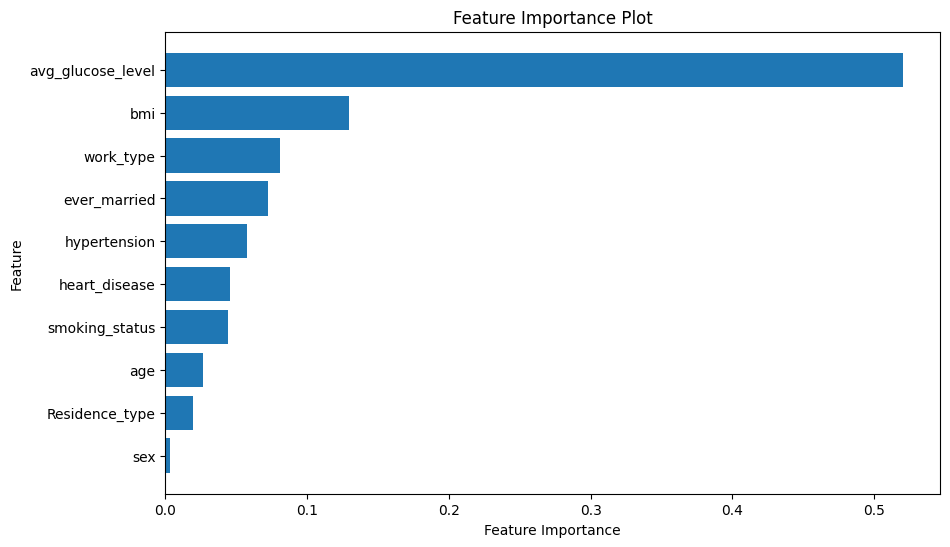

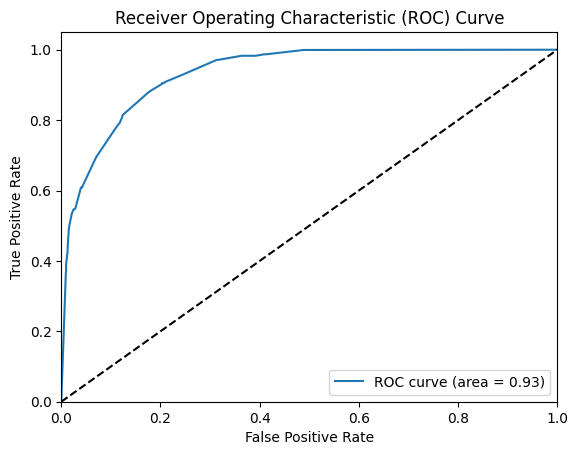

AUC Score: 0.933521322120906
Accuracy for each fold: [0.7666666666666667, 0.7666666666666667, 0.83, 0.7966666666666666, 0.7566666666666667, 0.8266666666666667, 0.7892976588628763, 0.862876254180602, 0.7859531772575251, 0.7859531772575251]
Mean accuracy: 0.7967413600891862
95% confidence interval: (0.7728025721230682, 0.8206801480553041)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


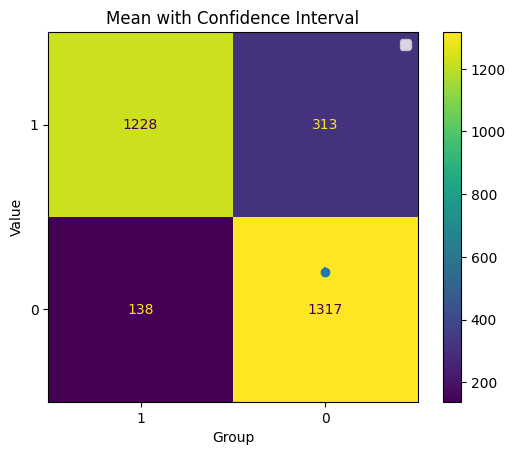

In [30]:
y_prob_dt_20_bmi, y_test_dt_20_bmi, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1541
           1       0.71      0.59      0.64      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.68      0.68      2996



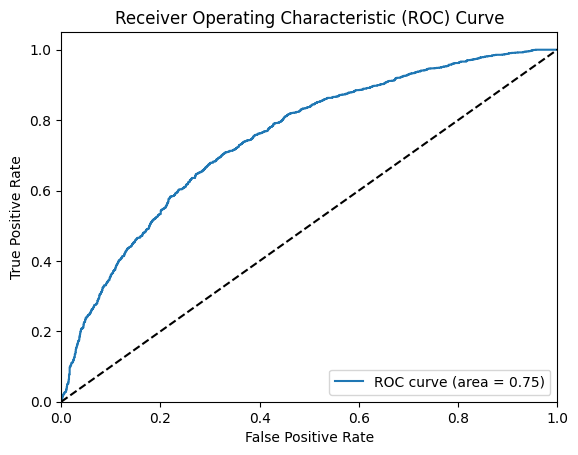

AUC Score: 0.7490186896088807


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7, 0.6833333333333333, 0.6933333333333334, 0.6233333333333333, 0.6666666666666666, 0.6866666666666666, 0.6755852842809364, 0.6555183946488294, 0.6622073578595318, 0.6053511705685619]
Mean accuracy: 0.6651995540691192
95% confidence interval: (0.643423812559146, 0.6869752955790924)


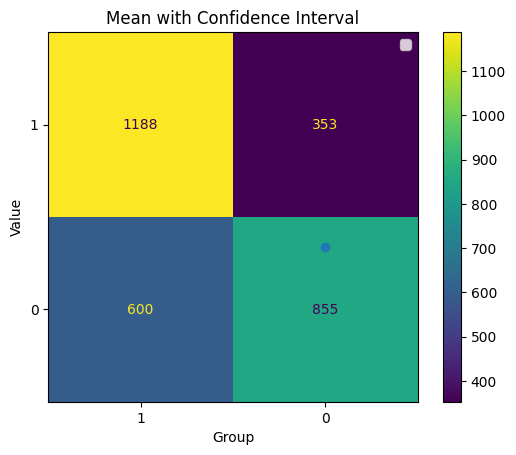

--------------------------------------


In [31]:
y_prob_svm_20_bmi, y_test_svm_20_bmi, svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

# Categorical

In [32]:
df = df_original.copy()

--------------------------------------
Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


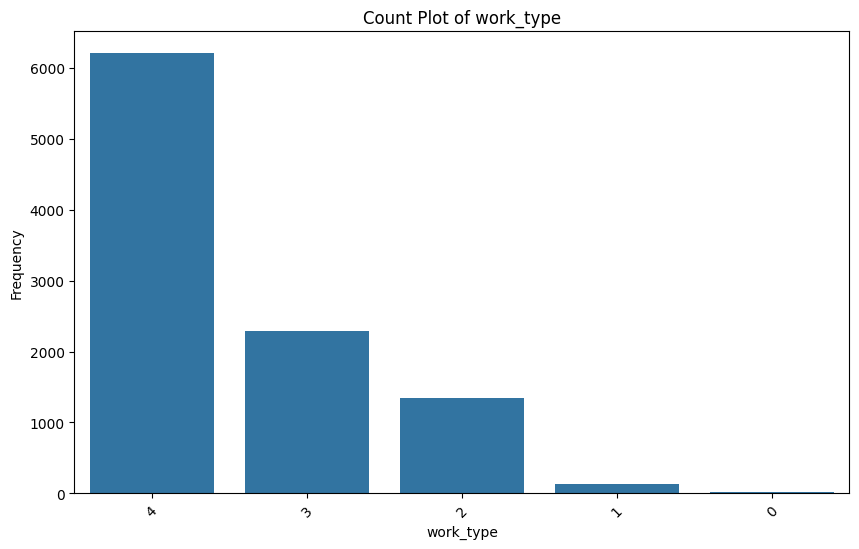

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 30, df)

Valore meno frequente:  0


Value counts:
work_type
4    4374
0    3012
3    1565
2     948
1      85
Name: count, dtype: int64
Outliers detected: [4, 0, 3, 2, 1]
Outliers found:


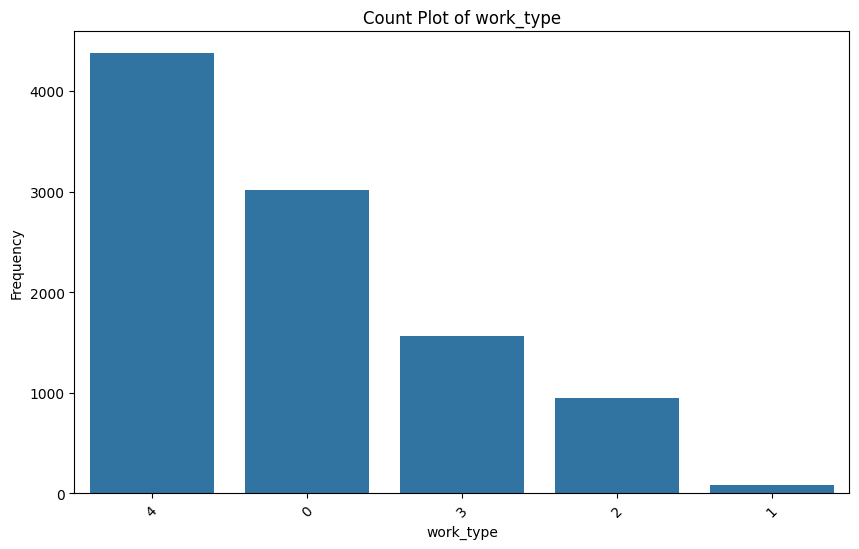

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1541
           1       0.79      0.90      0.84      1455

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.84      2996
weighted avg       0.84      0.84      0.84      2996

Node Labels:
 Annotation(0.623024, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


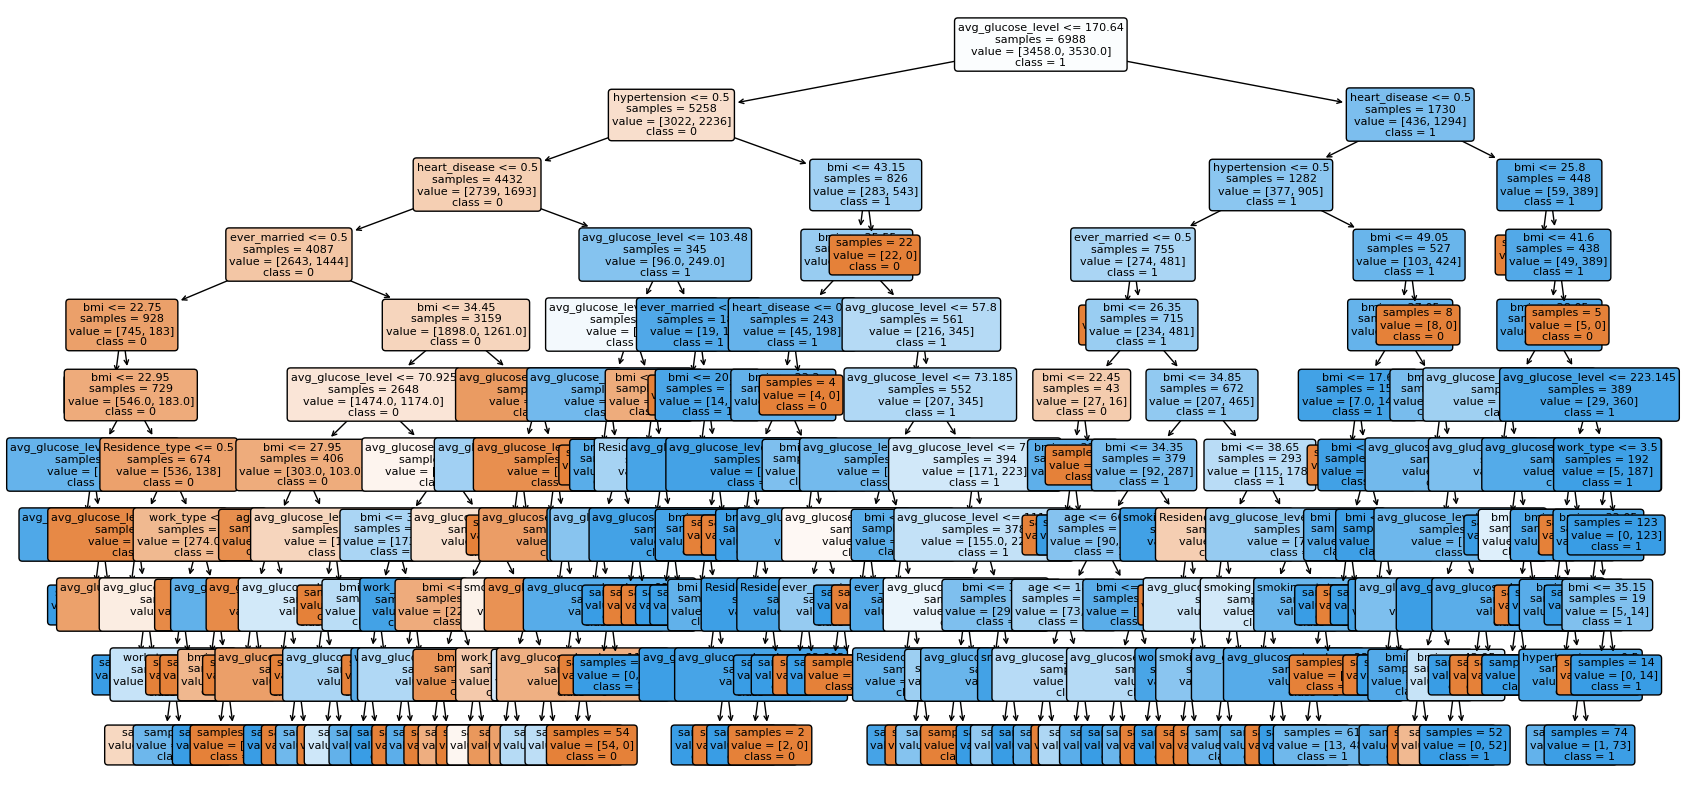

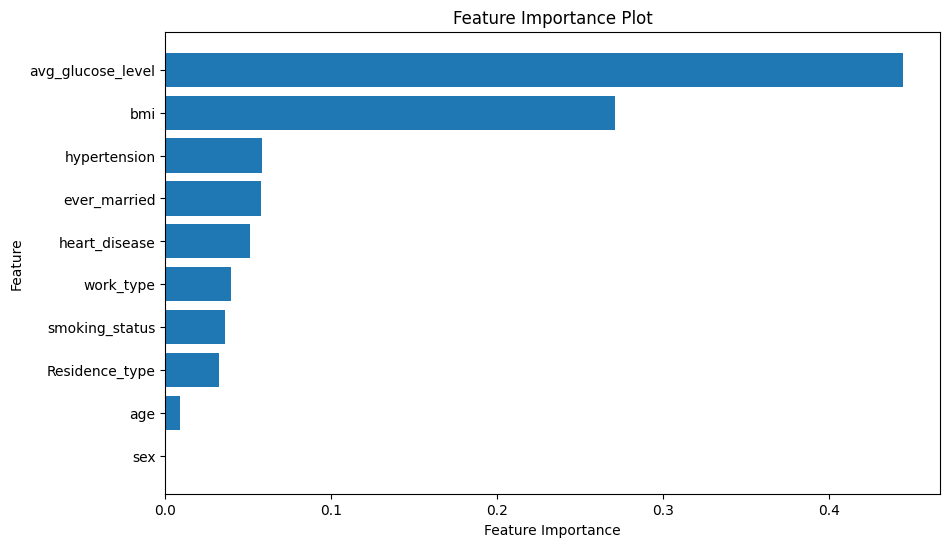

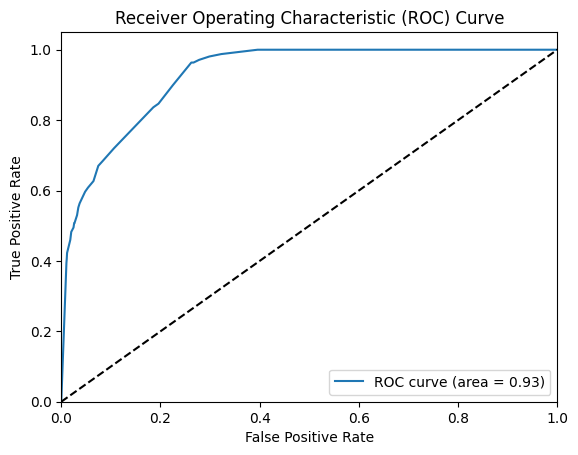

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9265356320147358
Accuracy for each fold: [0.8266666666666667, 0.78, 0.8333333333333334, 0.7866666666666666, 0.8033333333333333, 0.8433333333333334, 0.8260869565217391, 0.8294314381270903, 0.7959866220735786, 0.7658862876254181]
Mean accuracy: 0.8090724637681159
95% confidence interval: (0.7903082457295345, 0.8278366818066973)


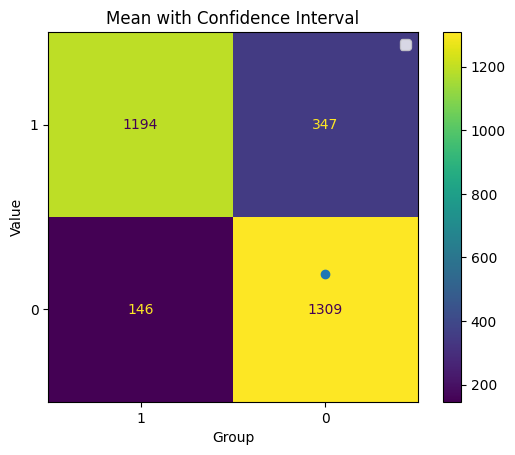

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
mean_accuracy_dt_categorical, confidence_interval_dt_categorical = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.80      0.72      1541
           1       0.72      0.56      0.63      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.67      2996
weighted avg       0.69      0.68      0.68      2996



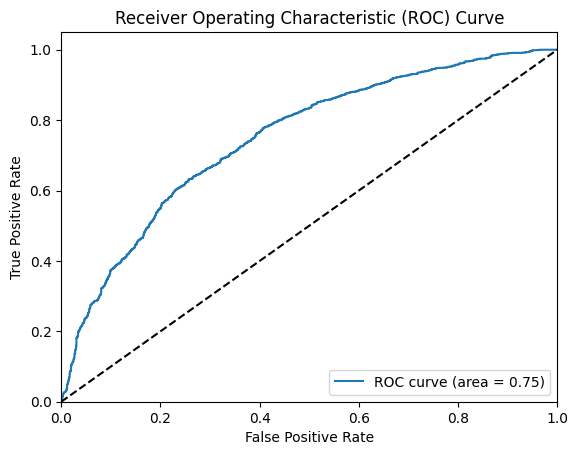

AUC Score: 0.74848304421416


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6766666666666666, 0.68, 0.7233333333333334, 0.6233333333333333, 0.6533333333333333, 0.6533333333333333, 0.6555183946488294, 0.6956521739130435, 0.6454849498327759, 0.6354515050167224]
Mean accuracy: 0.6642107023411371
95% confidence interval: (0.642817132219979, 0.6856042724622952)


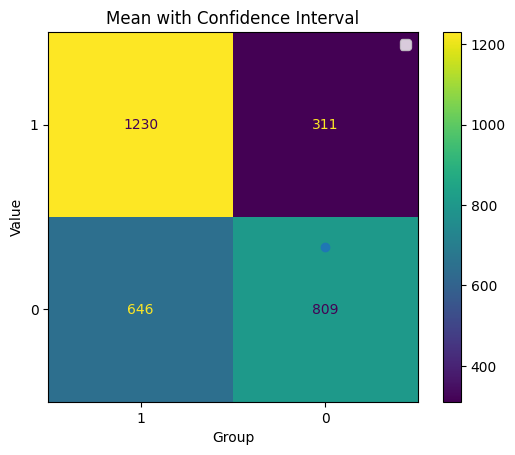

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, svm = ML_algorithms.model_svm(df_categorical, df_original)
mean_accuracy_svm_categorical, confidence_interval_svm_categorical = ML_algorithms.k_fold_cross_validation_dt(svm,df_original)

print('--------------------------------------')

## Conclusion

### ROC Curve

**Decision Tree**

Decision Tree


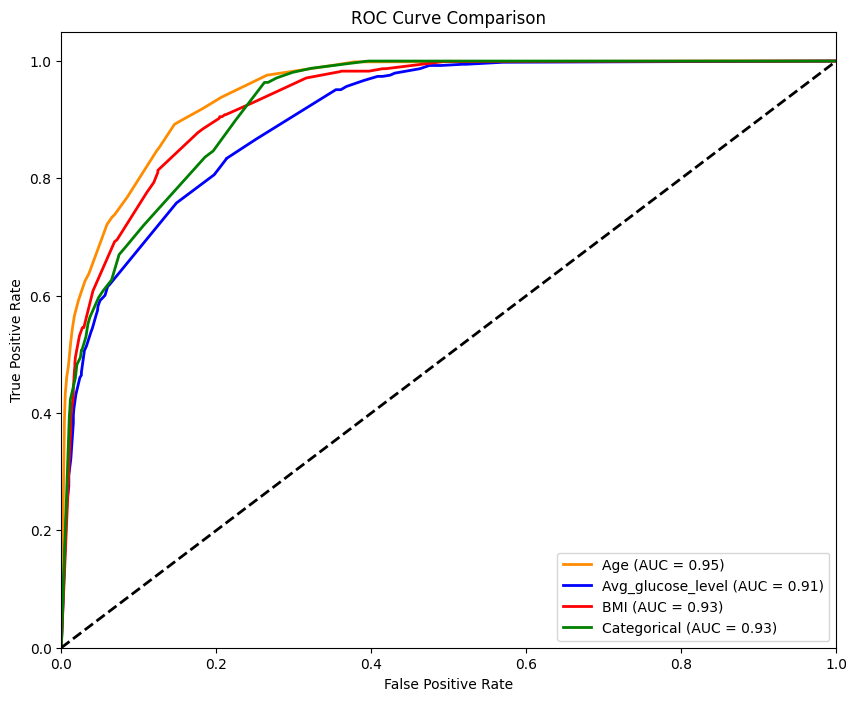

In [38]:
roc_results = [
    (y_pred_prob_age_dt, y_test_age_dt, 'Age'),
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_categorical_dt, y_test_categorical_dt, 'Categorical')
]

print('Decision Tree')
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Decision Tree - substitution of outliers**

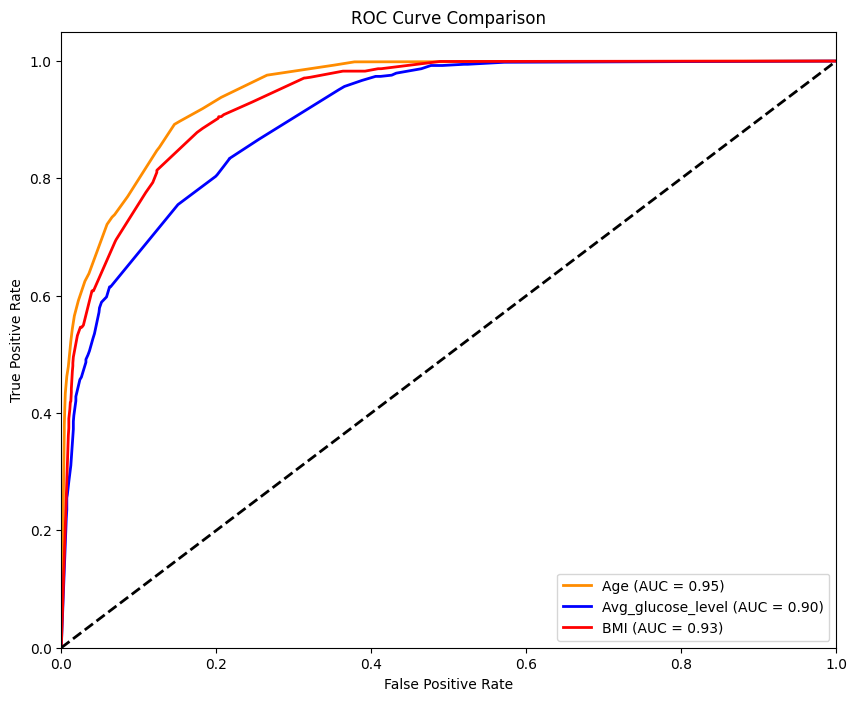

In [39]:
roc_results = [
    (y_prob_dt_20_age, y_test_dt_20_age, 'Age'),
    (y_prob_dt_20_glucose, y_test_dt_20_glucose, 'Avg_glucose_level'),
    (y_prob_dt_20_bmi, y_test_dt_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine**

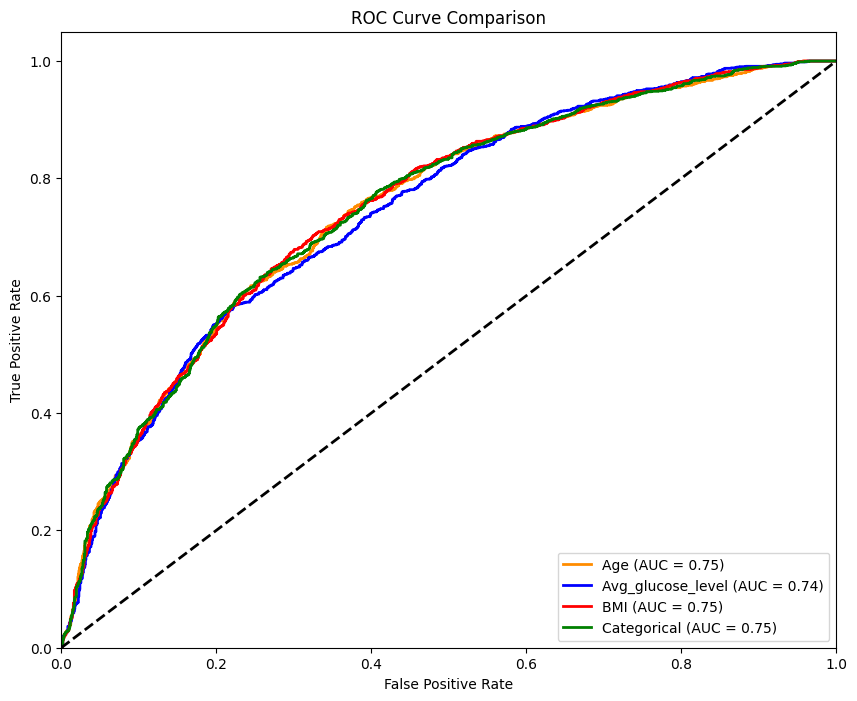

In [40]:
roc_results = [
    (y_pred_prob_age_svm, y_test_age_svm, 'Age'),
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_categorical_svm, y_test_categorical_svm, 'Categorical')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine - substitution of outliers**

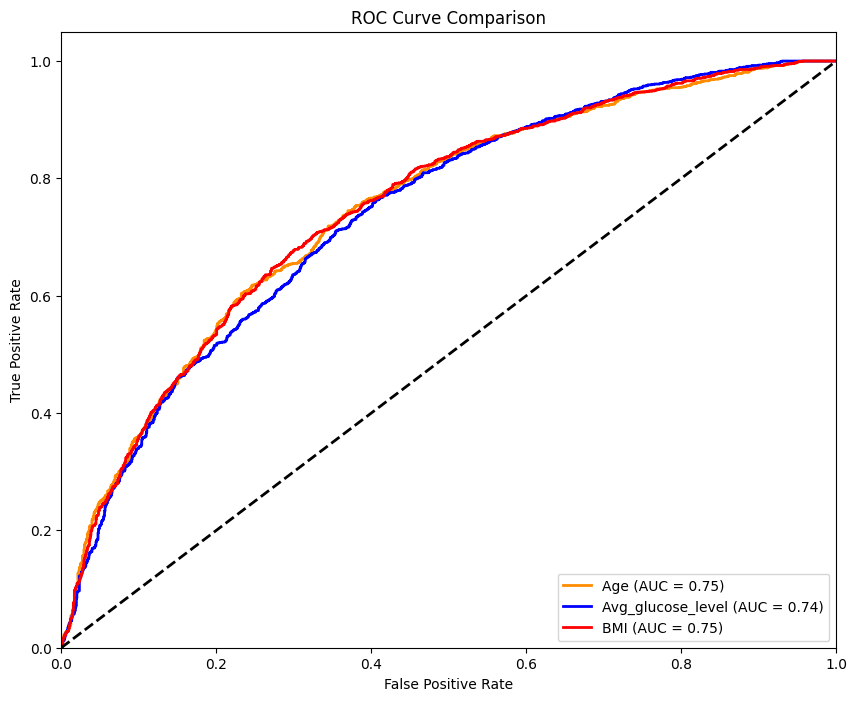

In [41]:
roc_results = [
    (y_prob_svm_20_age, y_test_svm_20_age, 'Age'),
    (y_prob_svm_20_glucose, y_test_svm_20_glucose, 'Avg_glucose_level'),
    (y_prob_svm_20_bmi, y_test_svm_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidential Interval

**Decision Tree**

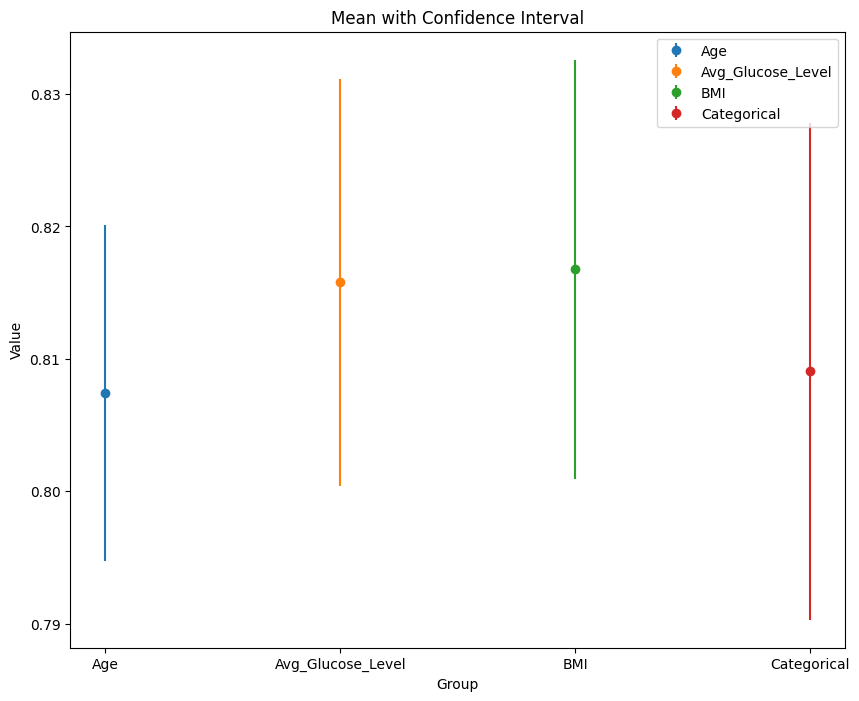

In [42]:
model_results = [
    ('Age', mean_accuracy_dt_age, confidence_interval_dt_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('Categorical', mean_accuracy_dt_categorical, confidence_interval_dt_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Decision Tree - substitution of outliers**

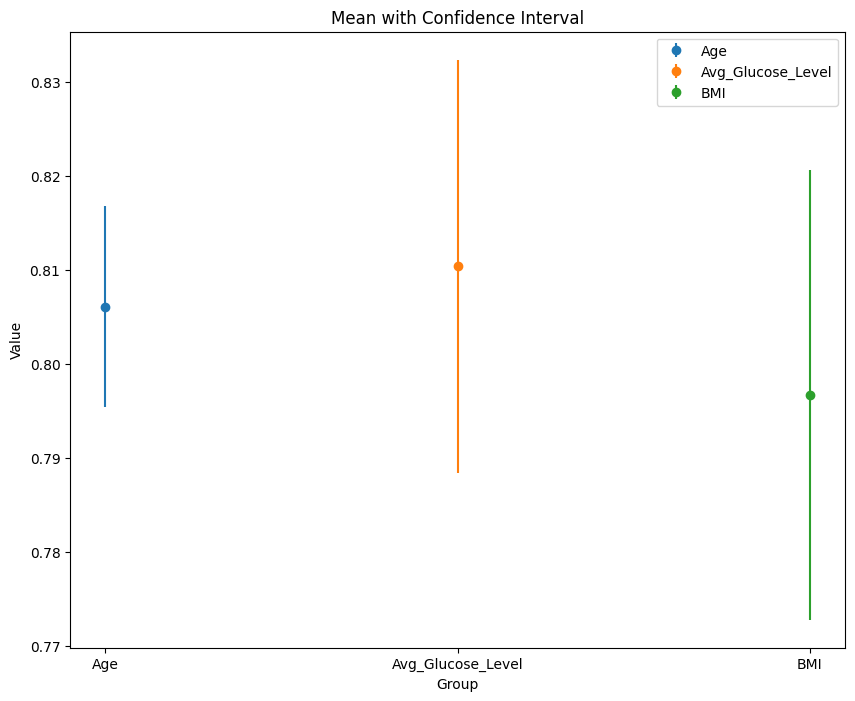

In [43]:
model_results = [
    ('Age', mean_accuracy_dt_20_age, confidence_interval_dt_20_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose),
    ('BMI', mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine**

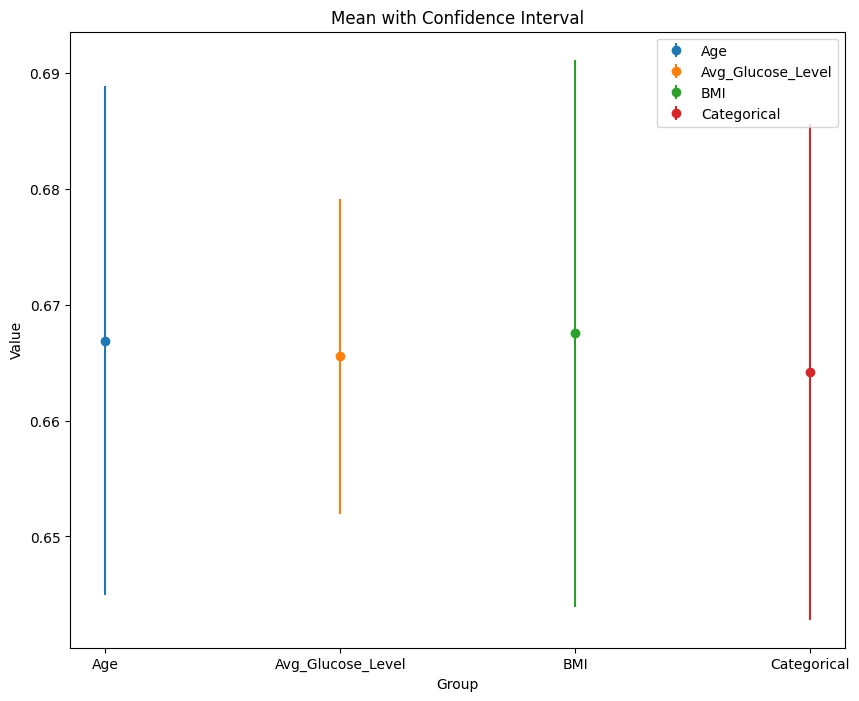

In [44]:
model_results = [
    ('Age', mean_accuracy_svm_age, confidence_interval_svm_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_glucose, confidence_interval_svm_glucose),
    ('BMI', mean_accuracy_svm_bmi, confidence_interval_svm_bmi),
    ('Categorical', mean_accuracy_svm_categorical, confidence_interval_svm_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine - substitution of outliers**

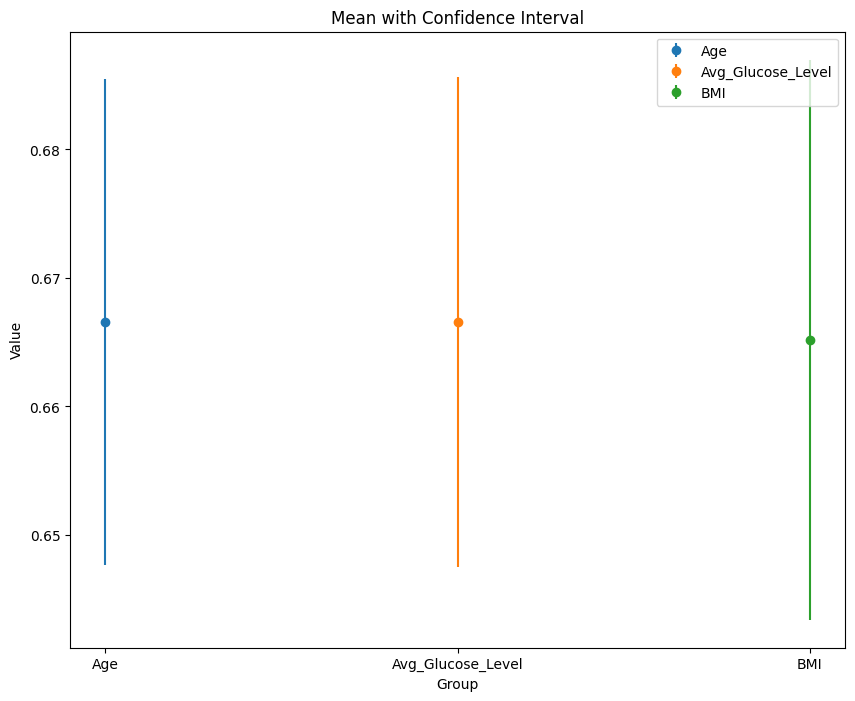

In [45]:
model_results = [
    ('Age', mean_accuracy_svm_20_age, confidence_interval_svm_20_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose),
    ('BMI', mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)